# Summary
I ran a pearson correlation to examine the relationship between gray matter volume and a measure of fluid intelligence, the Penn Progressive Matrices. Results were significant, r = 0.32, p < 0.001. Effect size interpretations vary, but based on the convention of small (0.1), medium (0.3), and large (0.5), a correlation of 0.32 would be considered medium.

$r^2$ was found to be 0.10, meaning that 10% of the variability in the task could be explained by gray matter volume, and vice-versa.

To test the effect of gender as a potential moderator, I ran the correlation between gray matter volume and the fluid intelligence measure for males and females separately. 

Results of the moderator analysis showed that while the directionality of correlation for both males and females were significant and positive, males had a greater correlation coefficient than females (r = 41 vs. r = .20), suggesting that brain size is more associated with fluid intelligence for males compared to females.

# Data Explanation
The Human Connectome Project's (HCP) *behavioral* dataset includes demographic information, performance on various tasks, and measures of brain structure/function for 1206 adults (ages 22+). The neuroimaging dataset includes four imaging modalities: structural images (T1w and T2w), resting-state fMRI (rfMRI), task-fMRI (tfMRI), and high angular resolution diffusion imaging (dMRI). These files can be quite large (tens of GB).

The data is open-access. The reference manual can be found [here](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf) and the data can be found [here](http://db.humanconnectome.org/) if you're interested. You will need to register an account to access the data, but that process should be straightforward.

# Replication Notes
I downloaded the HCP behavioral dataset on my google drive [here](https://drive.google.com/file/d/1-F5s908KDLcbfDlN1BYOBWKhe1E4tqWC/view?usp=sharing ), so to replicate the results of this notebook, you can simply follow that link and download the `HCP-behavioral.csv` file to your own Google Drive. 

Just make sure that when you're reading the file `data = pd.read_csv('/content/gdrive/MyDrive/Data/HCP-behavioral.csv')`, the path is correct. As you can see, I put my file in a folder called `Data`, but you can put yours wherever, as long as the path argument for the `read_csv()` function is specific to the location of your version of `HCP-behavioral.csv`.

# Imports, Mounts, and Reading Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
# Use this code block if notebook is being run in google colab, else comment it out.
# import google.colab.drive as drive
# drive.mount('/content/gdrive')
# data = pd.read_csv('/content/gdrive/MyDrive/Data/HCP-behavioral.csv')

In [3]:
# Use this code block if notebook is NOT being run in google colab, else comment it out.
import os
# This code works if HCP-behavioral.csv is in your current working directory (cwd).
cwd = os.getcwd()
data = pd.read_csv(cwd + '/HCP-behavioral.csv')

# Data Subsetting and Cleaning

In [4]:
print("total count: ", data['Subject'].count())
print(data.Age.value_counts())

total count:  1206
26-30    527
31-35    418
22-25    247
36+       14
Name: Age, dtype: int64


HCP dataset has four age groups. I will go with 26-30. The reason is because it is the largest group, and that age range should have less variability compared to the others: the brain has largely finished developing but age-related atrophy hasn't been given that much time.

Note that `FS_Total_GM_Vol` is the Total Gray Matter Volume, and `PMAT24_A_CR` is the the number correct on the fluid intelligence task (Penn Progressive Matrices).

In [5]:
data_subset = data[['Age','FS_Total_GM_Vol','PMAT24_A_CR', 'Gender']]
print("before dropna: ", len(data_subset))
data_subset = data_subset.dropna()
print("after dropna: ", len(data_subset))

data_high20s_subset = data_subset[data_subset['Age']=='26-30']

before dropna:  1206
after dropna:  1104


## Data Sidequest: ANOVA of GM volume by age
Use 'statsmodels.formula.api' to get ANOVA model

In [6]:
# I wonder what the GM_vol of different age groups look like?
import statsmodels.formula.api as smf # for the OLS module
import statsmodels.stats.multicomp as multi # for multiple comparisons test

vol_by_age_anova = smf.ols(formula='FS_Total_GM_Vol ~ C(Age)', data=data_subset)
print(vol_by_age_anova.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        FS_Total_GM_Vol   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     21.25
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.21e-13
Time:                        00:02:39   Log-Likelihood:                -13803.
No. Observations:                1104   AIC:                         2.761e+04
Df Residuals:                    1100   BIC:                         2.763e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.066e+05   4300.226    1

Super-duper significant of course, given the amount of samples. Should visualize it. Line plot feels like it should work, although data is not longitudinal. Beware of age cohort effects.

Age
22-25    706616.639130
26-30    692388.455487
31-35    667876.566138
36+      638289.461538
Name: FS_Total_GM_Vol, dtype: float64


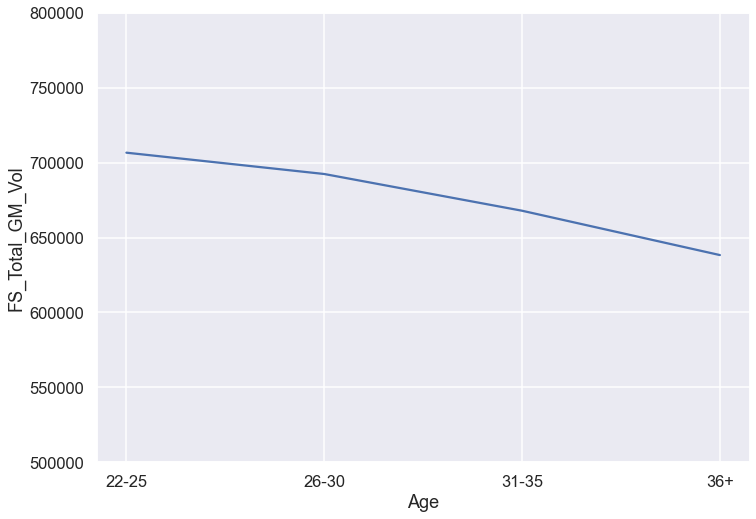

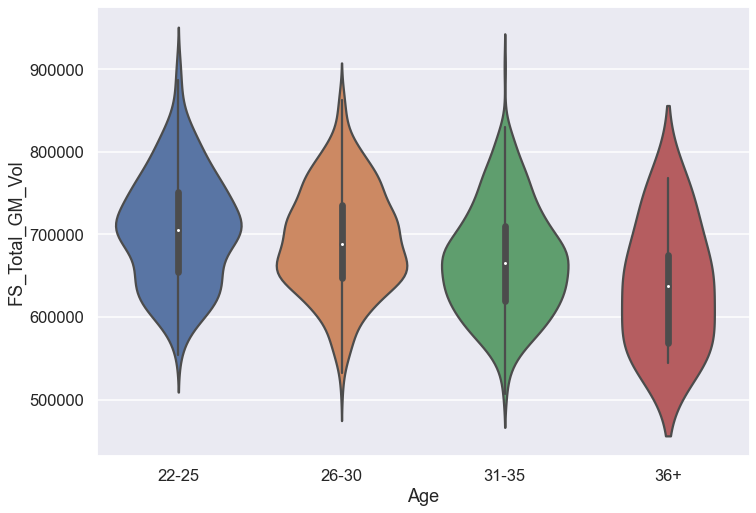

In [11]:
GM_Vol_by_age_mean = data_subset.groupby(['Age'])['FS_Total_GM_Vol'].mean()
print(GM_Vol_by_age_mean)

sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=GM_Vol_by_age_mean)
plt.ylim([500000, 800000])
plt.show()

data_subset_age_sorted = data_subset.sort_values(by=['Age'])
ax = sns.violinplot(x=data_subset_age_sorted['Age'], y=data_subset_age_sorted['FS_Total_GM_Vol'])

# Correlation Analysis and Results

In [ ]:
# Running the correlation
X = data_high20s_subset['FS_Total_GM_Vol'] 
Y = data_high20s_subset['PMAT24_A_CR']
corr = stats.pearsonr(X, Y)

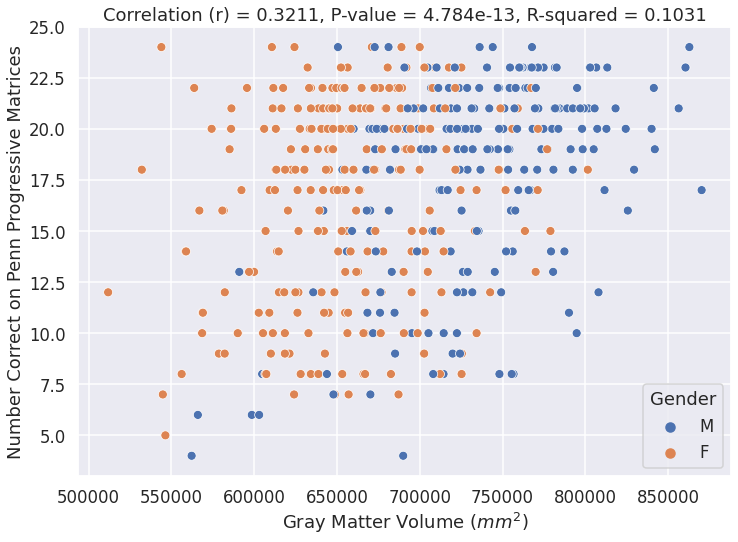

In [ ]:
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X, y=Y, hue=data_high20s_subset['Gender'])
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()

# Moderator Analysis
Run the brain size and fluid intelligence correlation for male and female separately.

In [ ]:
data.Gender.value_counts()

F    656
M    550
Name: Gender, dtype: int64

In [ ]:
data_high20s_male = data[(data['Age']=='26-30') & (data['Gender']=='M')]
data_high20s_female = data[(data['Age']=='26-30') & (data['Gender']=='F')]

data_high20s_male_subset = data_high20s_male[['FS_Total_GM_Vol','PMAT24_A_CR']]
data_high20s_male_subset.dropna(inplace=True)

data_high20s_female_subset = data_high20s_female[['FS_Total_GM_Vol','PMAT24_A_CR']]
data_high20s_female_subset.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Correlation for Males

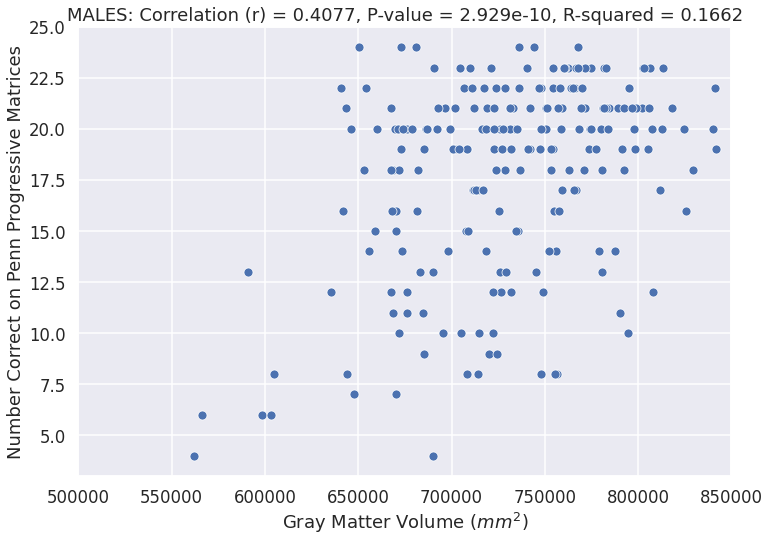

In [ ]:
# Running the correlation
X_male = data_high20s_male_subset['FS_Total_GM_Vol'] 
Y_male = data_high20s_male_subset['PMAT24_A_CR']
corr = stats.pearsonr(X_male, Y_male)
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_male, y=Y_male)
plt.xlim((500000,850000))
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'MALES: Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()

## Correlation for Females

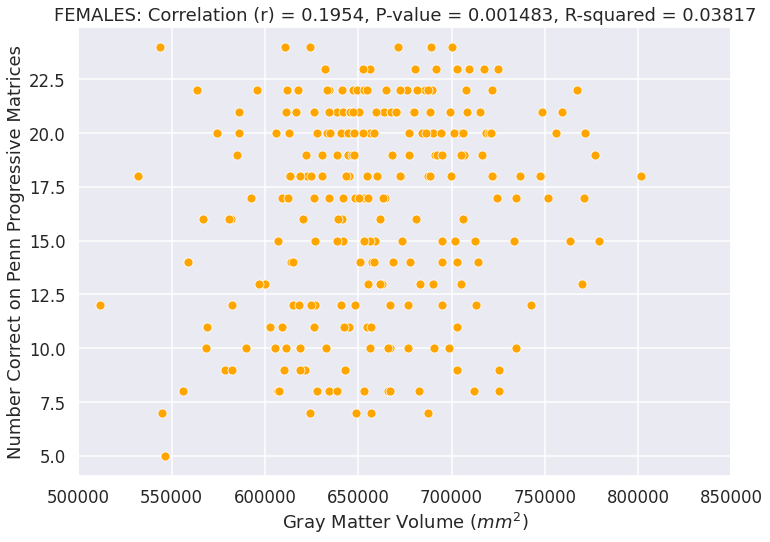

In [ ]:
# Running the correlation
X_female = data_high20s_female_subset['FS_Total_GM_Vol'] 
Y_female = data_high20s_female_subset['PMAT24_A_CR']
corr = stats.pearsonr(X_female, Y_female)
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_female, y=Y_female, color='orange')
plt.xlim((500000,850000))
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'FEMALES: Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()

# Additional Figures

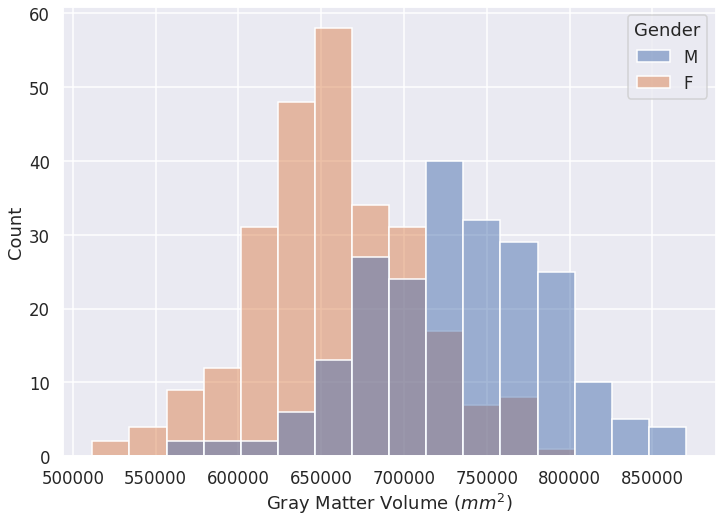

In [ ]:
sns.histplot(x=data_high20s_subset['FS_Total_GM_Vol'], hue=data_high20s_subset['Gender'])
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.show()

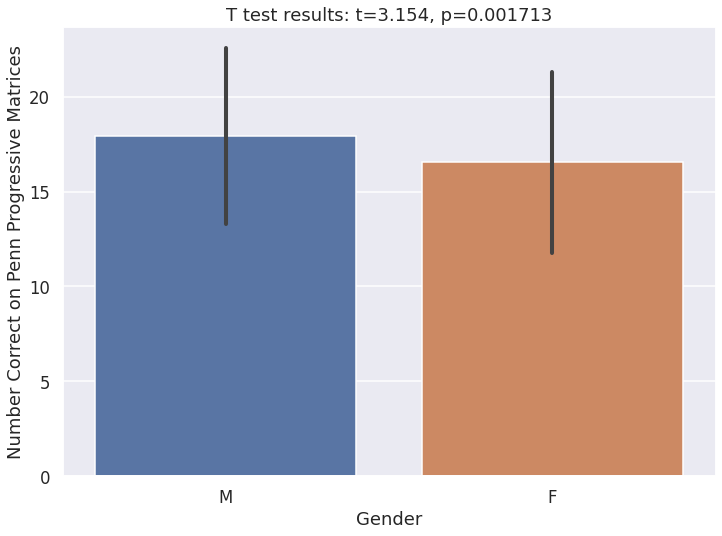

In [ ]:
ttest_g = stats.ttest_ind(Y_male, Y_female)
sns.barplot(data=data_high20s_subset, x='Gender', y='PMAT24_A_CR', ci='sd')
plt.title(f'T test results: t={ttest_g[0]:.4g}, p={ttest_g[1]:.4g}')
plt.ylabel('Number Correct on Penn Progressive Matrices')
plt.show()

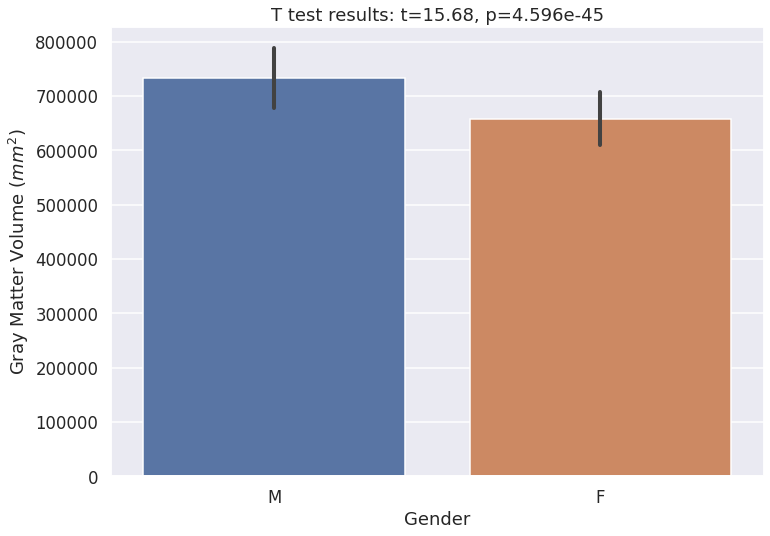

In [ ]:
ttest_vol = stats.ttest_ind(X_male, X_female)
sns.barplot(data=data_high20s_subset, x='Gender', y='FS_Total_GM_Vol', ci='sd')
plt.title(f'T test results: t={ttest_vol[0]:.4g}, p={ttest_vol[1]:.4g}')
plt.ylabel('Gray Matter Volume ($mm^2$)')
plt.show()

In [32]:
!pip install researchpy
import researchpy as rp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
rp_ttest_vol = rp.ttest(X_male, X_female)
rp_ttest_g = rp.ttest(Y_male, Y_female)

In [43]:
rp_ttest_vol[1]

,Independent t-test,results
0,Difference (FS_Total_GM_Vol - FS_Total_GM_Vol) =,74640.0110
1,Degrees of freedom =,481.0000
2,t =,15.6819
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4323
7,Hedge's g =,1.4300
8,Glass's delta =,1.3562
9,Pearson's r =,0.5816


In [44]:
rp_ttest_g[1]

,Independent t-test,results
0,Difference (PMAT24_A_CR - PMAT24_A_CR) =,1.3599
1,Degrees of freedom =,481.0000
2,t =,3.1538
3,Two side test p value =,0.0017
4,Difference < 0 p value =,0.9991
5,Difference > 0 p value =,0.0009
6,Cohen's d =,0.2880
7,Hedge's g =,0.2876
8,Glass's delta =,0.2923
9,Pearson's r =,0.1423
